## import required libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## read csv file 

In [103]:
used_cars=pd.read_csv('used_cars_data.csv')
used_cars.head()

,Unnamed: 0,Brand,Year,Model,Distance_in_k,Fuel_type,Transmission_type,Emi_amount,Area,Prices_in_lakhs
0,0,Maruti,2016,Ciaz,83.61k,Petrol,Manual,"11,124","Garuda Mall, Magrath Road, Bengaluru",5.69 lakh
1,1,Maruti,2020,Ciaz,61.12k,Petrol,Manual,"13,196","Bellahalli, Bengaluru",6.75 lakh
2,2,Tata,2022,NEXON,19.30k,Petrol,Manual,"17,036","Whitefield Main Road, Bhoruka Tech Park, Beng...",8.95 lakh
3,3,Maruti,2018,Vitara,37.18k,Diesel,Auto,"15,418","Whitefield Main Road, Bhoruka Tech Park, Beng...",8.10 lakh
4,4,Mahindra,2022,Bolero,627.40k,Diesel,Manual,"17,340","Vaishnavi Sapphire Centre, Yeswanthpur",9.11 lakh


In [125]:
used_cars.head()

,Brand,Year,Model,Distance_in_k,Fuel_type,Transmission_type,Emi_amount,Area,Prices_in_lakhs,City
0,Maruti,2016,Ciaz,83.61,Petrol,Manual,11124.0,"Garuda Mall, Magrath Road, Bengaluru",5.69,Bengaluru
1,Maruti,2020,Ciaz,61.12,Petrol,Manual,13196.0,"Bellahalli, Bengaluru",6.75,Bengaluru
2,Tata,2022,NEXON,19.30,Petrol,Manual,17036.0,"Whitefield Main Road, Bhoruka Tech Park, Beng...",8.95,Bengaluru
3,Maruti,2018,Vitara,37.18,Diesel,Auto,15418.0,"Whitefield Main Road, Bhoruka Tech Park, Beng...",8.10,Bengaluru
4,Mahindra,2022,Bolero,627.40,Diesel,Manual,17340.0,"Vaishnavi Sapphire Centre, Yeswanthpur",9.11,Yeswanthpur


## check the shape of your dataframe


In [104]:
used_cars.shape

(760, 10)

## check columns

In [105]:
used_cars.columns

Index(['Unnamed: 0', 'Brand', 'Year', 'Model', 'Distance_in_k', 'Fuel_type',
       'Transmission_type', 'Emi_amount', 'Area', 'Prices_in_lakhs'],
      dtype='object')

## data information

In [106]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         760 non-null    int64 
 1   Brand              760 non-null    object
 2   Year               760 non-null    int64 
 3   Model              760 non-null    object
 4   Distance_in_k      735 non-null    object
 5   Fuel_type          760 non-null    object
 6   Transmission_type  760 non-null    object
 7   Emi_amount         758 non-null    object
 8   Area               760 non-null    object
 9   Prices_in_lakhs    760 non-null    object
dtypes: int64(2), object(8)
memory usage: 59.5+ KB


## check duplicates

In [107]:
used_cars.duplicated().sum()

0

## check null values

In [108]:
# check null values columnwise
used_cars.isnull().sum()

Unnamed: 0            0
Brand                 0
Year                  0
Model                 0
Distance_in_k        25
Fuel_type             0
Transmission_type     0
Emi_amount            2
Area                  0
Prices_in_lakhs       0
dtype: int64

## filled null values with zeros, replace unwanted characters and changed datatype of columns


In [109]:
used_cars=used_cars.drop(columns=['Unnamed: 0'])
used_cars['Distance_in_k'] = pd.to_numeric(used_cars['Distance_in_k'].replace({'k': '', ',': ''}, regex=True), errors='coerce').astype(float)
used_cars['Distance_in_k']=used_cars['Distance_in_k'].fillna(used_cars['Distance_in_k'].median())
used_cars['Emi_amount']=used_cars['Emi_amount'].replace(',','', regex=True).astype(float).fillna(0)
used_cars['Prices_in_lakhs']=used_cars['Prices_in_lakhs'].replace('lakh','', regex=True).astype(float)
used_cars['Year']=used_cars['Year'].astype(object)
used_cars['Area']=used_cars['Area'].replace('\n','', regex=True)
used_cars['City']=used_cars['Area'].str.split(',').str[-1]

## fill null vaues with median

In [110]:
used_cars.isnull().sum()

Brand                0
Year                 0
Model                0
Distance_in_k        0
Fuel_type            0
Transmission_type    0
Emi_amount           0
Area                 0
Prices_in_lakhs      0
City                 0
dtype: int64

## unique values

In [111]:
print(used_cars['City'].unique())
print(used_cars['City'].nunique())

[' Bengaluru' ' Yeswanthpur' ' Gandhi Nagar' ' Nexus Whitefield'
 ' Dombivli East' ' Mumbai' ' Seawood' ' Mumbai ' ' Hyderabad' ' Pune'
 ' Chennai' ' Vadapalani']
12


In [112]:
# check unique values in brand column
print(used_cars['Brand'].unique())
print(used_cars['Brand'].nunique())

[' Maruti' ' Tata' ' Mahindra' ' Renault' ' Hyundai' ' Toyota' ' Honda'
 ' Nissan' ' Volkswagen' ' Datsun' ' Ford' ' MG' ' KIA' ' Skoda' ' Jeep']
15


In [113]:
# check unique values in Year column
print(used_cars['Year'].unique())
print(used_cars['Year'].nunique())

[2016 2020 2022 2018 2017 2021 2015 2019 2023 2014 2013 2024 2011 2012]
14


In [114]:
# check unique values in Model column
print(used_cars['Model'].unique())
print(used_cars['Model'].nunique())

['Ciaz' 'NEXON' 'Vitara' 'Bolero' 'TRIBER' 'Creta' 'TIGOR' 'Kwid' 'i10'
 'Grand' 'Swift' 'Tiago' 'Celerio' 'Wagon' 'FRONX' 'NEW' 'Glanza' 'Baleno'
 'City' 'VENUE' 'MAGNITE' 'S' 'Jazz' 'Polo' 'Redi' 'Alto' 'Brio' 'Eon'
 'Terrano' 'Amaze' 'IGNIS' 'Ecosport' 'BR' 'Verna' 'XUV300' 'New' 'PUNCH'
 'BOLERO' 'ASTOR' 'Eeco' 'GRAND' 'SONET' 'i20' 'Rapid' 'Xcent' 'Elite'
 'Ertiga' 'Etios' 'Duster' 'Dzire' 'FREESTYLE' 'WR' 'Compass' 'ALTROZ'
 'SELTOS' 'TUV300' 'Vento' 'ALCAZAR' 'XUV700' 'Safari' 'Thar' 'HECTOR'
 'KUSHAQ' 'EXTER' 'Go' 'Ameo' 'XUV500' 'TAIGUN' 'Kuv100' 'SLAVIA' 'Ritz'
 'Harrier' 'AURA' 'XL6']
74


In [115]:
# check unique values in Fuel_type column
print(used_cars['Fuel_type'].unique())
print(used_cars['Fuel_type'].nunique())

['Petrol' 'Diesel' 'CNG']
3


In [116]:
# check unique values in Transmission_type column
print(used_cars['Transmission_type'].unique())
print(used_cars['Transmission_type'].nunique())

['Manual' 'Auto']
2


In [117]:
# checking information once again
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              760 non-null    object 
 1   Year               760 non-null    object 
 2   Model              760 non-null    object 
 3   Distance_in_k      760 non-null    float64
 4   Fuel_type          760 non-null    object 
 5   Transmission_type  760 non-null    object 
 6   Emi_amount         760 non-null    float64
 7   Area               760 non-null    object 
 8   Prices_in_lakhs    760 non-null    float64
 9   City               760 non-null    object 
dtypes: float64(3), object(7)
memory usage: 59.5+ KB


## Check the description of the data

In [118]:
used_cars.describe()

,Distance_in_k,Emi_amount,Prices_in_lakhs
count,760.000000,760.000000,760.000000
mean,78.443776,12896.315789,6.144118
std,127.603500,7085.900314,3.908155
min,1.160000,0.000000,1.630000
25%,20.692500,8147.250000,3.197500
50%,44.630000,10870.000000,4.835000
75%,82.022500,16141.000000,8.240000
max,995.990000,42256.000000,22.200000


In [119]:
used_cars.head()

,Brand,Year,Model,Distance_in_k,Fuel_type,Transmission_type,Emi_amount,Area,Prices_in_lakhs,City
0,Maruti,2016,Ciaz,83.61,Petrol,Manual,11124.0,"Garuda Mall, Magrath Road, Bengaluru",5.69,Bengaluru
1,Maruti,2020,Ciaz,61.12,Petrol,Manual,13196.0,"Bellahalli, Bengaluru",6.75,Bengaluru
2,Tata,2022,NEXON,19.30,Petrol,Manual,17036.0,"Whitefield Main Road, Bhoruka Tech Park, Beng...",8.95,Bengaluru
3,Maruti,2018,Vitara,37.18,Diesel,Auto,15418.0,"Whitefield Main Road, Bhoruka Tech Park, Beng...",8.10,Bengaluru
4,Mahindra,2022,Bolero,627.40,Diesel,Manual,17340.0,"Vaishnavi Sapphire Centre, Yeswanthpur",9.11,Yeswanthpur


## split columns as numerical and categorical 


In [55]:
numerical_columns=used_cars.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_columns=used_cars.select_dtypes(include=['object']).columns.tolist()
print(numerical_columns)
print('-'*50)
print(categorical_columns)

['Distance_in_k', 'Emi_amount', 'Prices_in_lakhs']
--------------------------------------------------
['Brand', 'Year', 'Model', 'Fuel_type', 'Transmission_type', 'Area', 'City']


# univariate analysis

# numerical univariate analysis

In [62]:
# create a function to plot different graphs in numerical columns
def numerical(df, column):
    print(df[column].agg(['min','max','mean','std','skew']))
    print()
    # distribution
    plt.figure(figsize=(8,6), layout= 'constrained')
    ## histogram
    plt.subplot(2,2,1)
    df[column].plot(kind='hist', bins=20)
    plt.title("Histogram plot")
    plt.xlabel(column)
    plt.ylabel('frequency')

    plt.subplot(2,2,2)
    df[column].plot(kind='kde')
    plt.title('KDE plot')
    plt.xlabel(column)

    plt.subplot(2,2,3)
    df[column].plot(kind='box')
    plt.title('Box plot')

    plt.subplot(2,2,4)
    stats.probplot(df[column], dist='norm', plot=plt)
    plt.title('QQ for normal distribution')



# create a function to find outliers
def iqr(dataset, column):
    q1=dataset[column].quantile(0.25)
    q3=dataset[column].quantile(0.75)
    IQR=q3-q1
    lower_limit=(q1-IQR*1.5)
    upper_limit=(q3+IQR*1.5)
    outliers=(dataset[column] < lower_limit) | (dataset[column] > upper_limit)
    return len(dataset[outliers])

# adjust outlier with statistical method
def impute_outliers(dataset, column):
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR
    # Replace outliers with the median
    median_value = dataset[column].median()
    dataset[column] = dataset[column].apply(lambda x: median_value if x < lower_limit or x > upper_limit else x)
    return dataset

## Distance_in_k

min       1.160000
max     995.990000
mean     78.443776
std     127.603500
skew      4.468061
Name: Distance_in_k, dtype: float64

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
IQR is :-  73
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

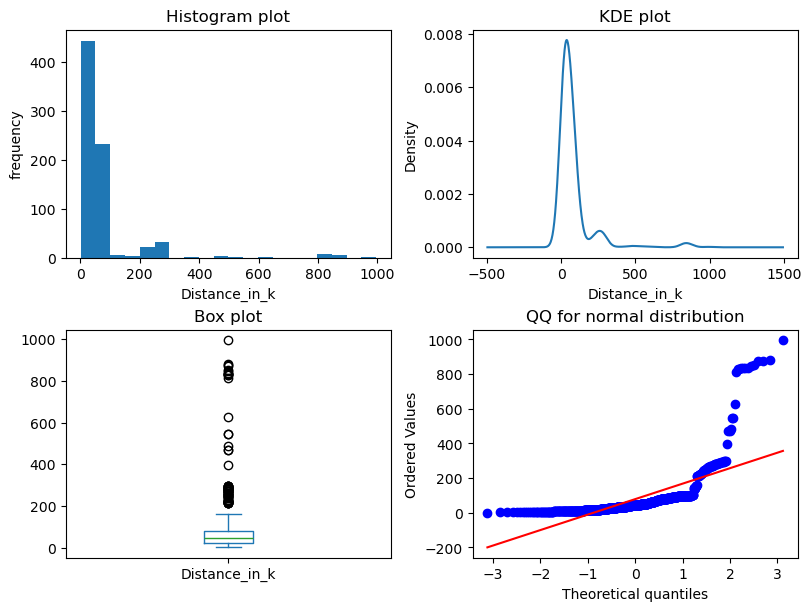

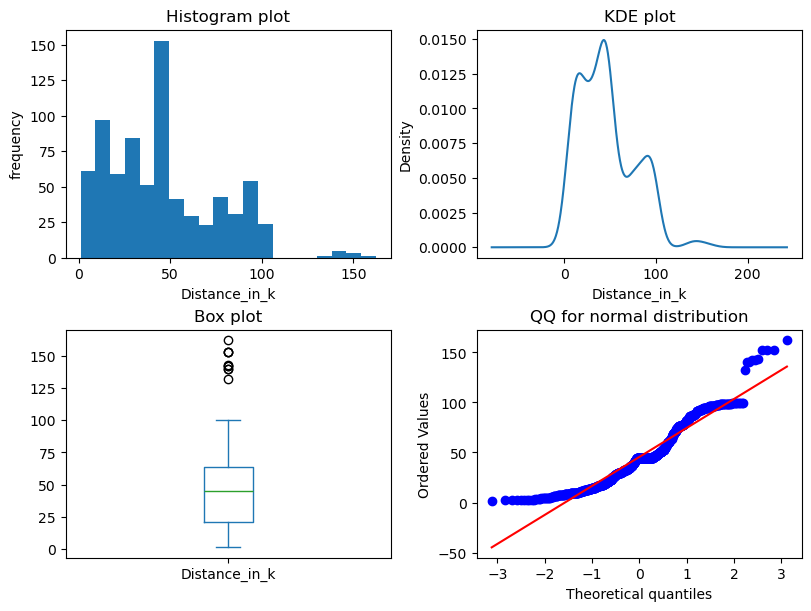

In [121]:
numerical(used_cars, 'Distance_in_k')
print('-'*500)
print('IQR is :- ',iqr(used_cars, 'Distance_in_k'))
print('-'*500)
cleaned_data= impute_outliers(used_cars.copy(), 'Distance_in_k')
numerical(cleaned_data, 'Distance_in_k')
plt.savefig('Uni_dist.jpg')

## Prices_in_lakhs

min      1.630000
max     22.200000
mean     6.144118
std      3.908155
skew     1.386407
Name: Prices_in_lakhs, dtype: float64

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
IQR is :-  19
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

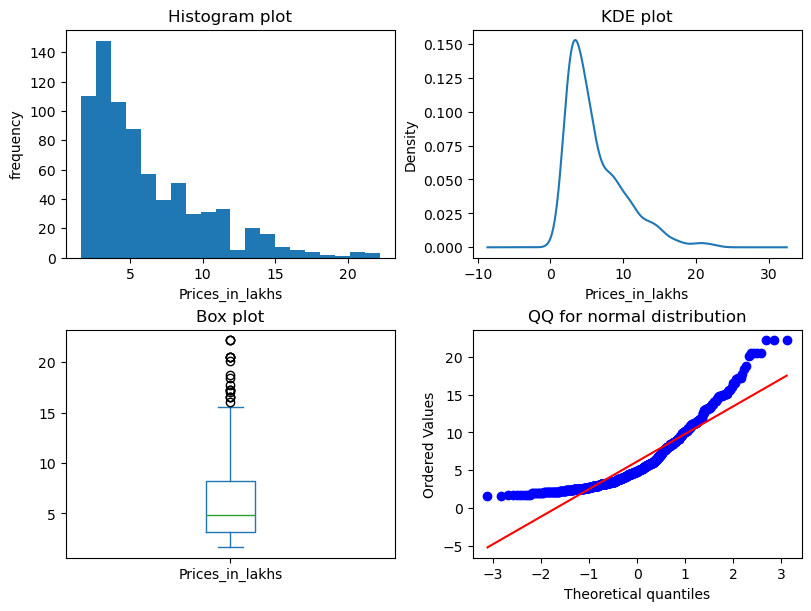

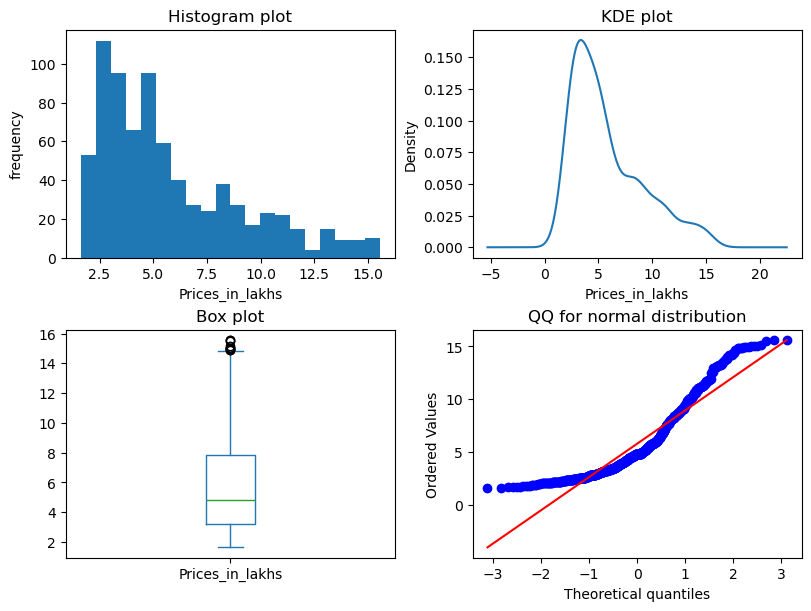

In [64]:
numerical(used_cars, 'Prices_in_lakhs')
print('-'*500)
print('IQR is :- ',iqr(used_cars, 'Prices_in_lakhs'))
print('-'*500)
cleaned_data= impute_outliers(used_cars.copy(), 'Prices_in_lakhs')
numerical(cleaned_data, 'Prices_in_lakhs')
plt.savefig('uni_prices.jpg')

## Emi_amount

min         0.000000
max     42256.000000
mean    12896.315789
std      7085.900314
skew        1.331920
Name: Emi_amount, dtype: float64

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
IQR is :-  34
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

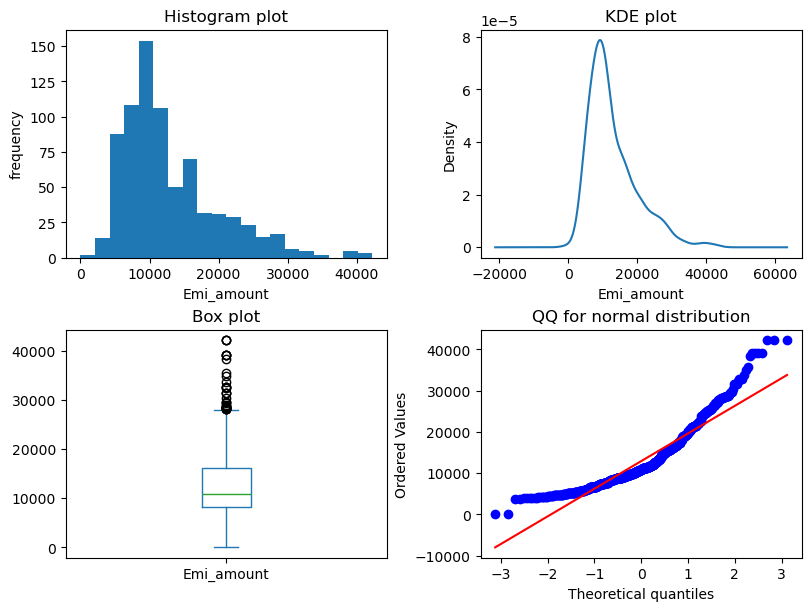

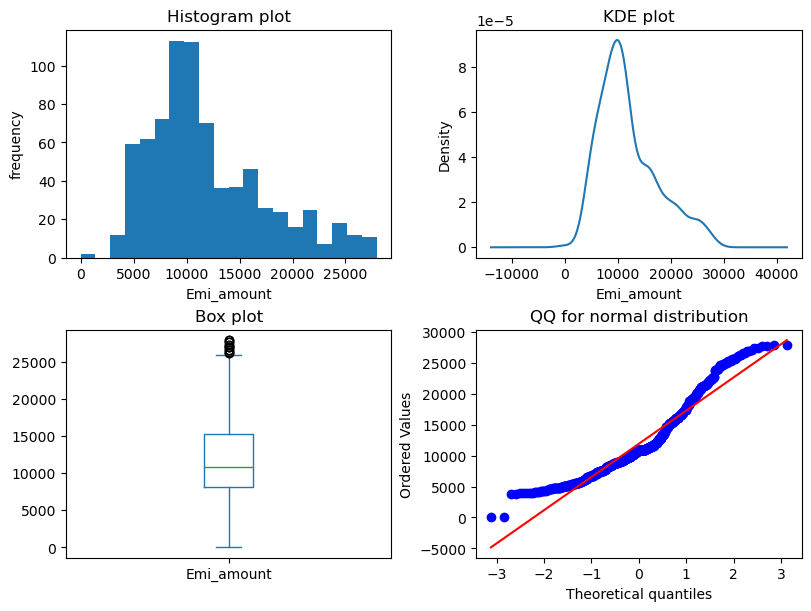

In [65]:
numerical(used_cars, 'Emi_amount')
print('-'*500)
print('IQR is :- ',iqr(used_cars, 'Emi_amount'))
print('-'*500)
cleaned_data= impute_outliers(used_cars.copy(), 'Emi_amount')
numerical(cleaned_data, 'Emi_amount')
plt.savefig('uni_emi.jpg')

## Year

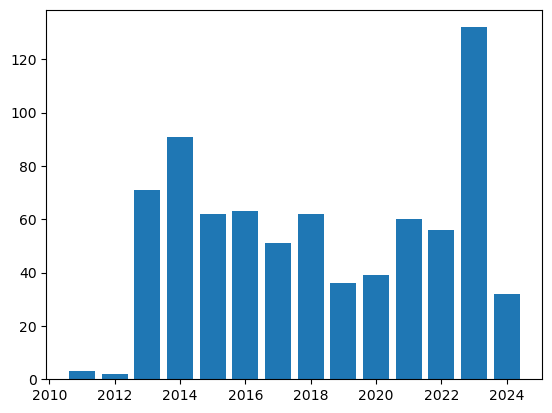

In [66]:
# show how many used cars in each year
year_count=used_cars['Year'].value_counts()
plt.bar(x=year_count.index, height=year_count.values)
plt.savefig('year_bar.jpg')
plt.show()
# we used bar plot to show count of purchased cars from each year
# The data has large number of cars available in 2022 

# categorical univariate analysis
Univariate analysis for categorical data involves analysis on single categorical column.
To understand distribution of data we plot different charts in univariate analysis.
We summarise categorical columns to find frequency of categories using charts like bar chart, pie chart.

In [67]:
categorical_columns

['Brand', 'Year', 'Model', 'Fuel_type', 'Transmission_type', 'Area', 'City']

In [122]:
def cat_chart(df, column):
    column_count=df[column].value_counts().head(10)
    plt.bar(x=column_count.index, height=column_count.values)

## Brand
showing count of available cars based on brands using bar plot 
Maruti car has maximum no of used cars and hyundai has the second highest used cars where as  
fiat and MG has less no of used cars

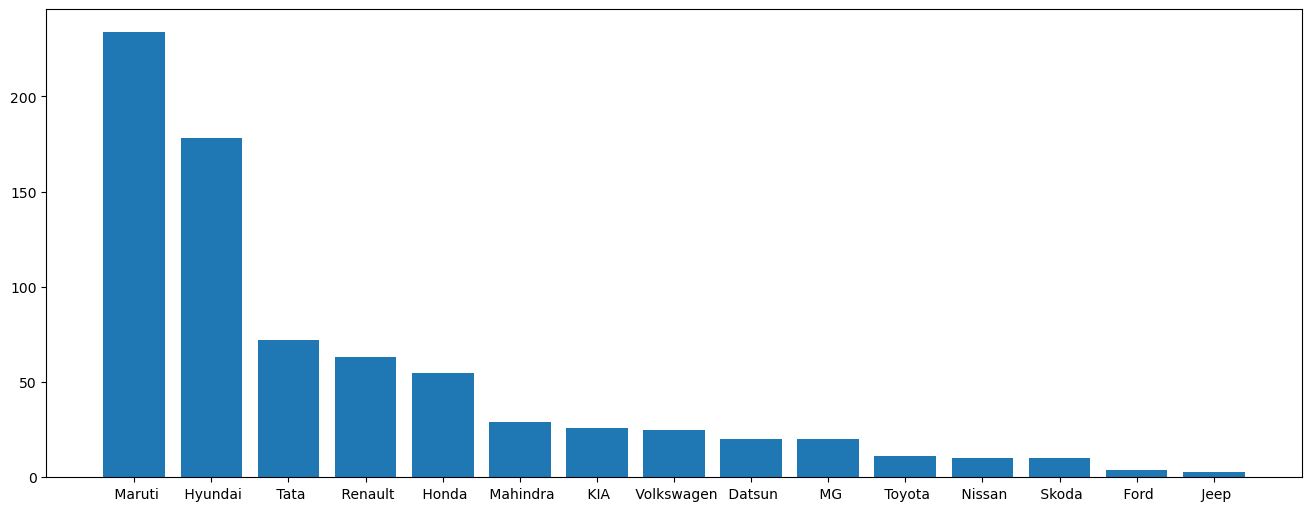

In [123]:
# brands column 
brand_count=used_cars['Brand'].value_counts()
plt.figure(figsize=(13,5), layout='constrained')
plt.bar(x=brand_count.index, height=brand_count.values)
plt.savefig('bar_brand_count.jpg')
plt.show()

## Model
Top five car models have taken to show the availability of car models

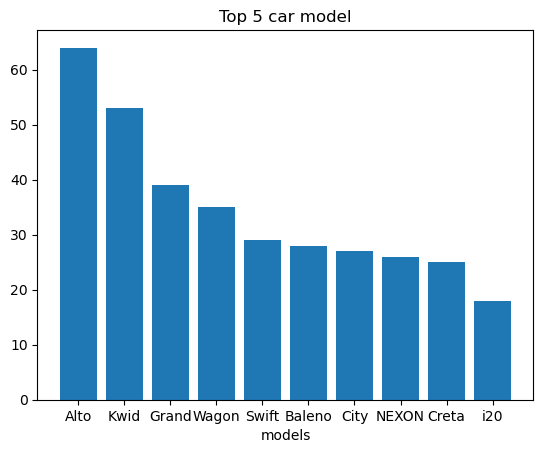

In [124]:
cat_chart(used_cars, 'Model')
plt.savefig('model_bar_pies.jpg')
plt.title('Top 5 car model')
plt.xlabel('models')
plt.show()

## Fuel_type
use both bar plot and pie chart to visualise fuel_type column
In fuel_type column Petrol is used more compared to diesel and cng
use of cng is less than petrol and diesel

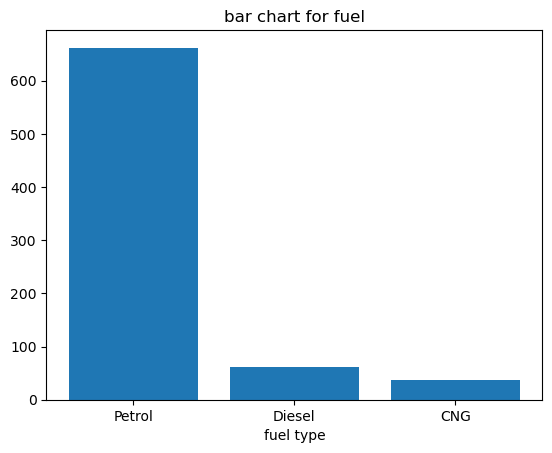

In [71]:
cat_chart(used_cars, 'Fuel_type')
plt.savefig('fuel_type_bar_pie.jpg')
plt.title('bar chart for fuel')
plt.xlabel('fuel type')
plt.show()

## Transmission_type
There are two type of transmission Manual and auto
Manual transmission is present in most of the cars
Auto transmission consists of only 13.5 percent of whole cars

Text(0.5, 23.52222222222222, 'trans type')

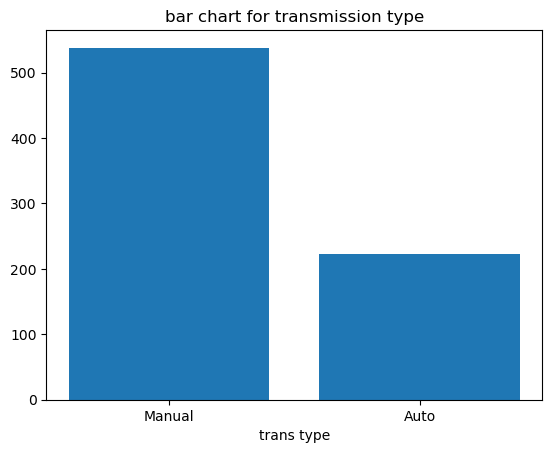

In [72]:
cat_chart(used_cars, 'Transmission_type')
plt.savefig('trans_type_bar_pie.jpg')
plt.title('bar chart for transmission type')
plt.xlabel('trans type')

# bivariate analysis

In [73]:
numerical_columns

['Distance_in_k', 'Emi_amount', 'Prices_in_lakhs']

In [74]:
categorical_columns

['Brand', 'Year', 'Model', 'Fuel_type', 'Transmission_type', 'Area', 'City']

## numerical vs numerical
We compare numerical columns with numerical columns to show the dispersion of data.
Find the relation between two continuous variables
Scatter plot is very effective to show dispersion of data
We identify correlation between continuous variables.
Scatter plot, Correlation plot, pairplot, line plot used to visualise the relationship between two continuous variables.

In [75]:
def num_num(data, column1, column2):
    # numerical vs numerical
    plt.scatter(x=data[column1], y=data[column2])

### Dist_vs_emi_amount

Text(0, 0.5, 'emi')

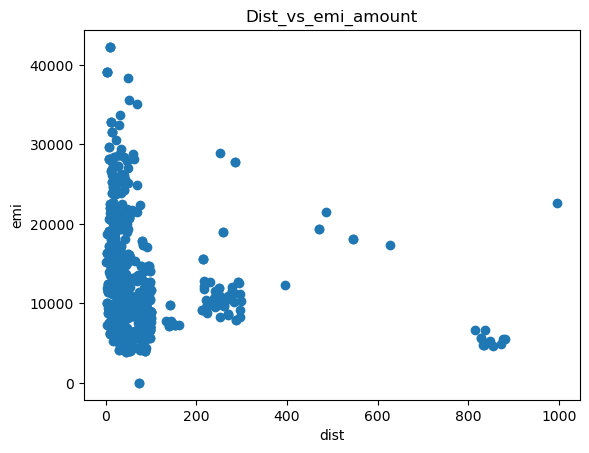

In [76]:
num_num(used_cars, 'Distance_in_k', 'Emi_amount' )
plt.title('Dist_vs_emi_amount')
plt.xlabel('dist')
plt.ylabel('emi')

### Transmission_type and Prices_in_lakhs

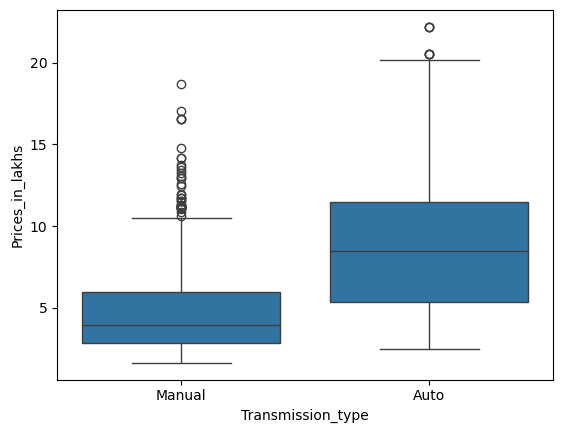

In [77]:
sns.boxplot(x=used_cars['Transmission_type'], y=used_cars['Prices_in_lakhs'])
plt.savefig('trans_price_1.jpg')
plt.show()

### Fuel_type vs Prices_in_lakhs

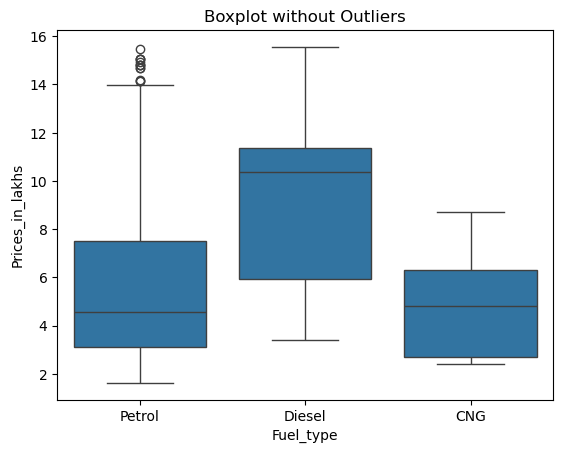

In [78]:
q1 = used_cars['Prices_in_lakhs'].quantile(0.25)
q3 = used_cars['Prices_in_lakhs'].quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR

df_cleaned = used_cars[(used_cars['Prices_in_lakhs'] >= lower_limit) & (used_cars['Prices_in_lakhs'] <= upper_limit)]

# Now plot without outliers
sns.boxplot(x="Fuel_type", y="Prices_in_lakhs", data=df_cleaned)
plt.title('Boxplot without Outliers')
plt.savefig('fuel_price_2.jpg')
plt.show()


### Transmission_type vs Distance_in_k

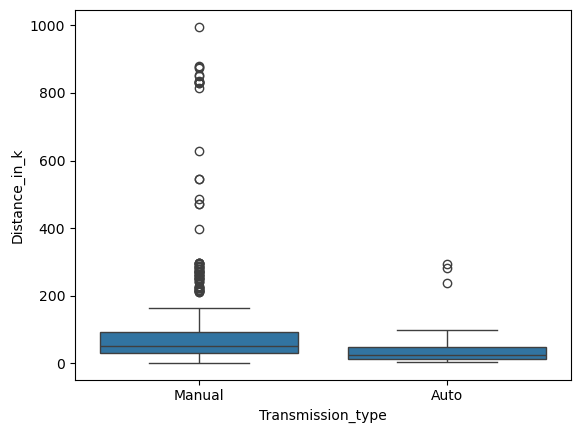

In [79]:
sns.boxplot(x=used_cars['Transmission_type'], y=used_cars['Distance_in_k'])
plt.savefig('trans_dist_1.jpg')
plt.show()

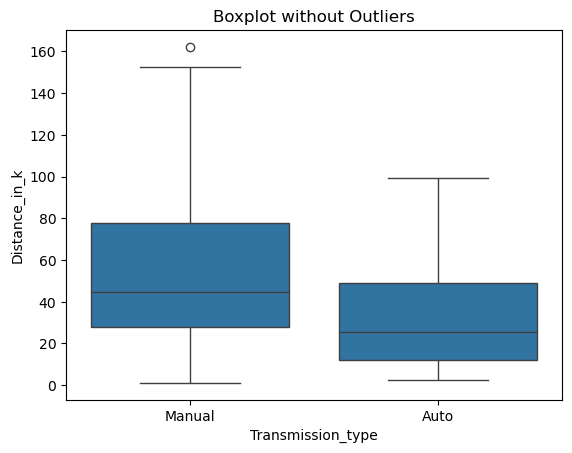

In [83]:
q1 = used_cars['Distance_in_k'].quantile(0.25)
q3 = used_cars['Distance_in_k'].quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR

df_cleaned = used_cars[(used_cars['Distance_in_k'] >= lower_limit) & (used_cars['Distance_in_k'] <= upper_limit)]

# Now plot without outliers
sns.boxplot(x="Transmission_type", y="Distance_in_k", data=df_cleaned)
plt.title('Boxplot without Outliers')
plt.savefig('trans_dist_2.jpg')
plt.show()


### Fuel_type vs Distance_in_k

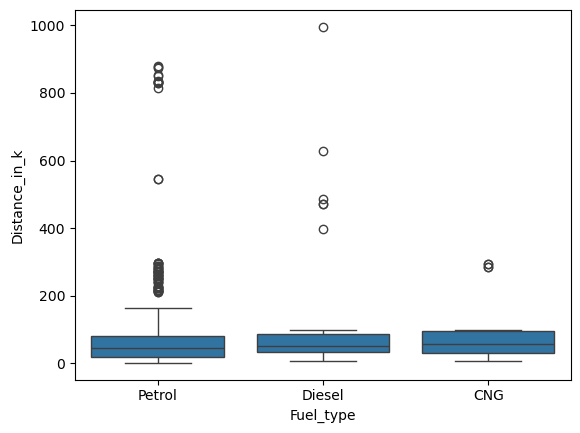

In [84]:
sns.boxplot(x=used_cars['Fuel_type'], y=used_cars['Distance_in_k'])
plt.savefig('fuel_dist_1.jpg')
plt.show()

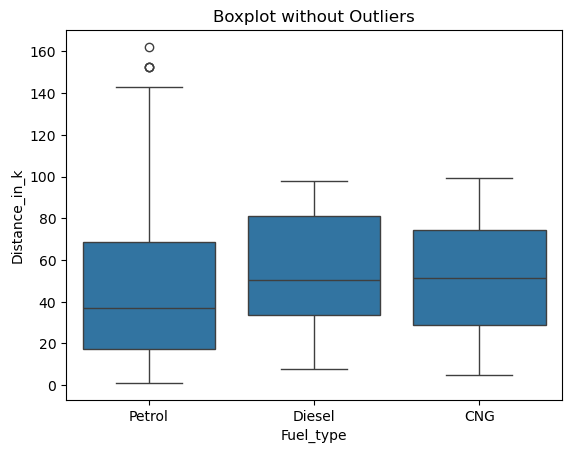

In [85]:
q1 = used_cars['Distance_in_k'].quantile(0.25)
q3 = used_cars['Distance_in_k'].quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR

df_cleaned = used_cars[(used_cars['Distance_in_k'] >= lower_limit) & (used_cars['Distance_in_k'] <= upper_limit)]

# Now plot without outliers
sns.boxplot(x="Fuel_type", y="Distance_in_k", data=df_cleaned)
plt.title('Boxplot without Outliers')
plt.savefig('fuel_dist_2.jpg')
plt.show()


### Distance_in_k and Prices_in_lakhs

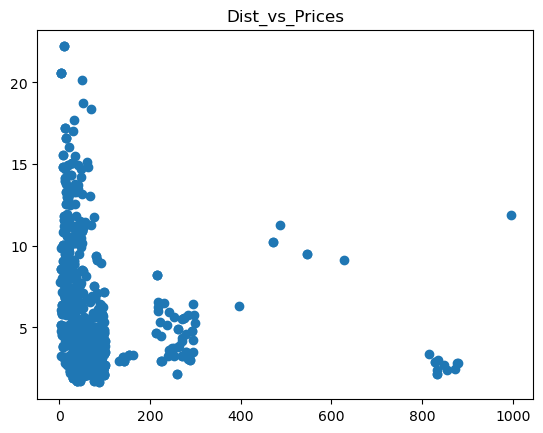

In [86]:
num_num(used_cars, 'Distance_in_k', 'Prices_in_lakhs' )
plt.title('Dist_vs_Prices')
plt.savefig('num_num_dist_price.jpg')

### Emi_amount vs Prices_in_lakhs

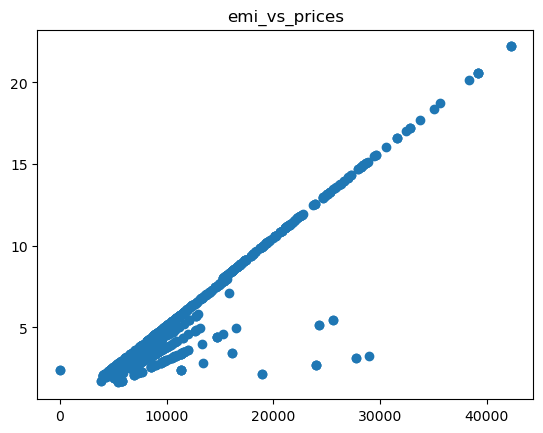

In [87]:
num_num(used_cars, 'Emi_amount', 'Prices_in_lakhs' )
plt.title('emi_vs_prices')
plt.savefig('num_num_emi_price.jpg')

### Year vs Prices_in_lakhs

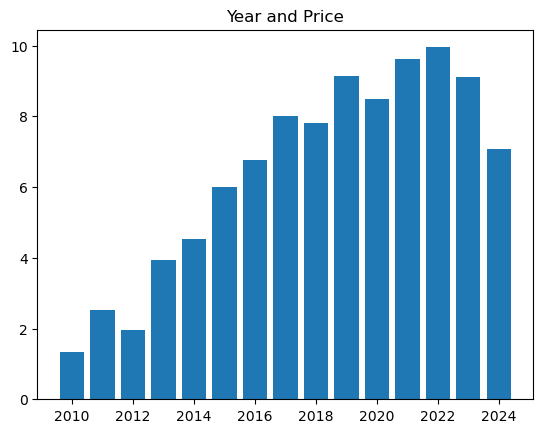

In [96]:
plt.bar(x=used_cars['Year'], height=used_cars['Prices_in_lakhs'])
plt.savefig('Year_prices.jpg')
plt.title('Year and Price')
plt.show()

## numerical vs categorical
We compare numerical variables with categorical variables to show the relationship between them.
Compare numerical variable with different categorical variables and plot different plots to find 
the relation.
Bar chart, Box plot, Violin plot used in numerical and categorical columns.

In [89]:
print(numerical_columns)
print(categorical_columns)

['Distance_in_k', 'Emi_amount', 'Prices_in_lakhs']
['Brand', 'Year', 'Model', 'Fuel_type', 'Transmission_type', 'Area', 'City']


In [90]:
def num_cat(df, column1, column2):
# numerical vs categorical
    plt.figure(figsize=(10,8))
    plt.subplot(2,2,1)
    plt.bar(x=df[column1], height=df[column2])
    plt.subplot(2,2,2)
    sns.boxplot(x=df[column1], y=df[column2])
    plt.subplot(2,2,3)
    sns.violinplot(x=df[column1], y=df[column2])
   

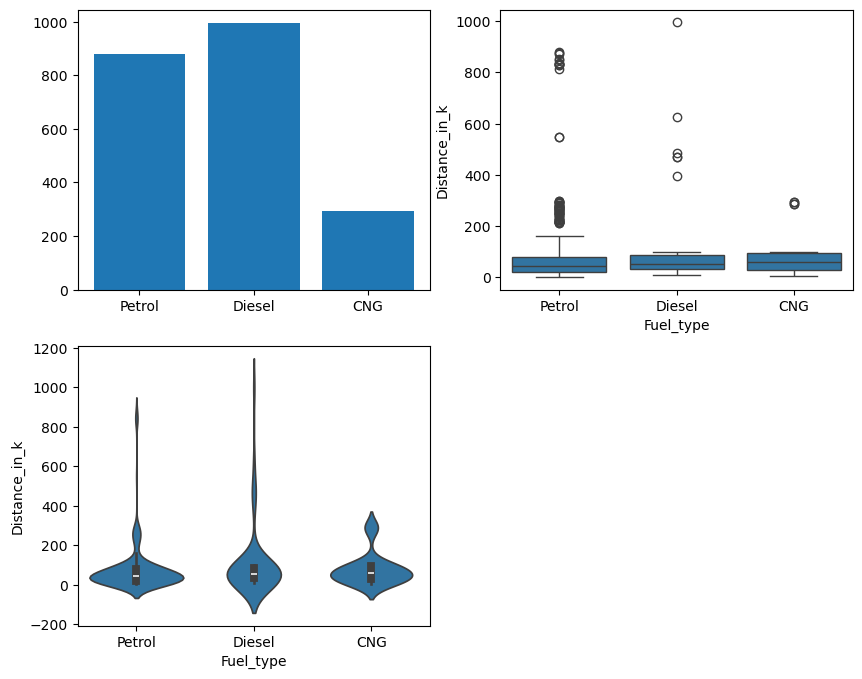

In [91]:
num_cat(used_cars, 'Fuel_type', 'Distance_in_k')
plt.savefig('num_cat_dist_fuel.jpg')

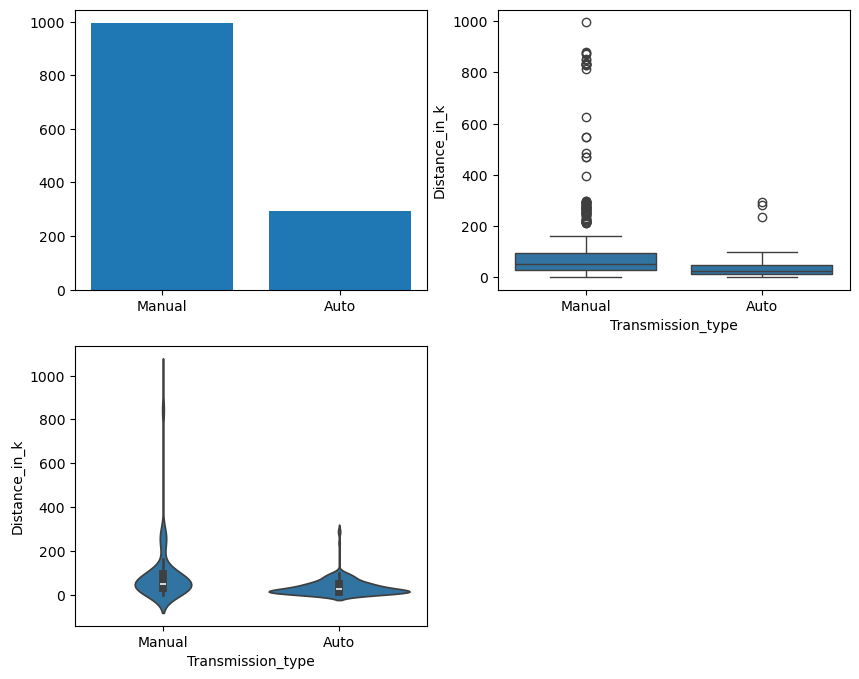

In [92]:
num_cat(used_cars, 'Transmission_type', 'Distance_in_k')

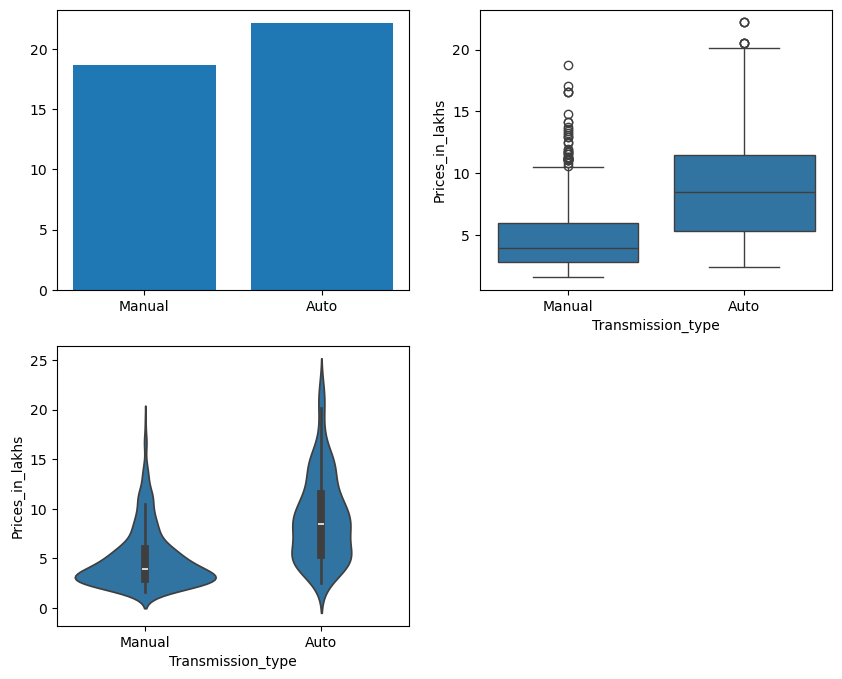

In [93]:
num_cat(used_cars, 'Transmission_type', 'Prices_in_lakhs')

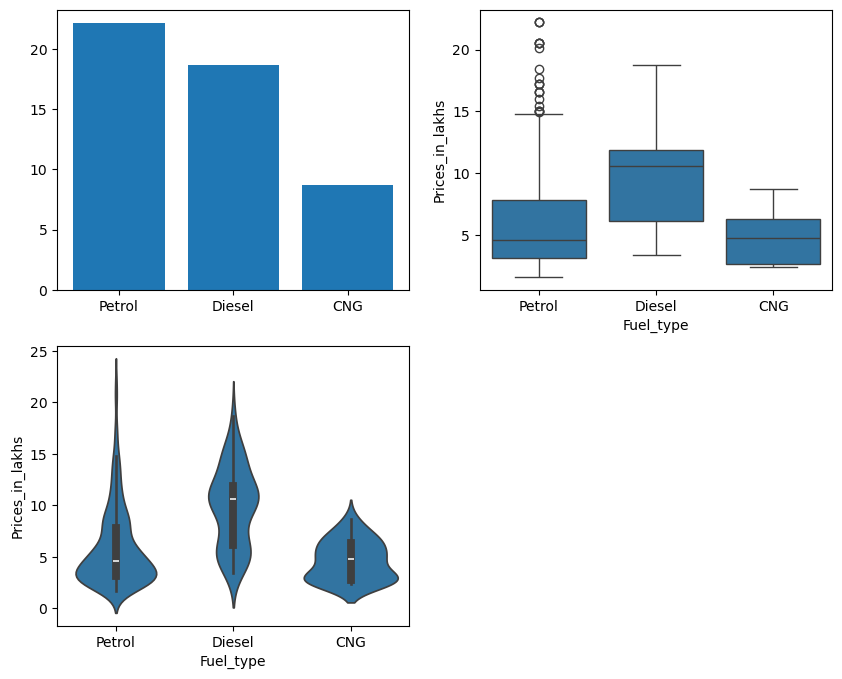

In [94]:
num_cat(used_cars, 'Fuel_type', 'Prices_in_lakhs')
plt.savefig('num_cat_fuel_price.jpg')

### top five models and price

C:\Users\Manisha\AppData\Local\Temp\ipykernel_13948\1614733729.py:4: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Model', y='Prices_in_lakhs', hue='Year', data=modify_index, palette=['lightblue', 'grey'])


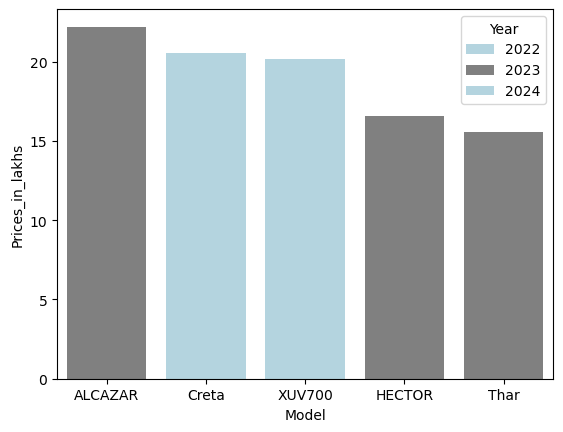

In [95]:
top_models=used_cars.groupby(['Model', 'Year'])['Prices_in_lakhs'].max().sort_values(ascending=False).head()
top_models
modify_index=top_models.reset_index()
sns.barplot(x='Model', y='Prices_in_lakhs', hue='Year', data=modify_index, palette=['lightblue', 'grey'])
plt.savefig('uni_top_model.jpg')
plt.show()

In [96]:
top_cars_model=used_cars.groupby('Model')['Year'].max().head()
top_cars_model

Model
ALCAZAR    2023
ALTROZ     2024
ASTOR      2023
AURA       2023
Alto       2024
Name: Year, dtype: object

In [97]:
desc_prices=used_cars['Prices_in_lakhs'].sort_values(ascending=False)

## categorical vs categorical
We compare categorical columns with categorical to show the relationship between them.
Plot different charts to find dependencies of columns on each other.
In categorical columns Bar chart, stacked bar charts, crosstab is used.
Take columns which has some relationship between them and plot charts.


## crosstab for categorical columns
Crosstab is used to show the relationship between two or more categorical columns.
It shows frequency distribution of columns to show the relation between them.
Crosstab is similar to pivot table.

In [98]:
def cat_cat(dataset, column1, column2):
# categorical vs categorical
    sns.countplot(x=dataset[column1], hue=dataset[column2])
    crosstab_result=pd.crosstab(dataset[column1], dataset[column2])
    return crosstab_result

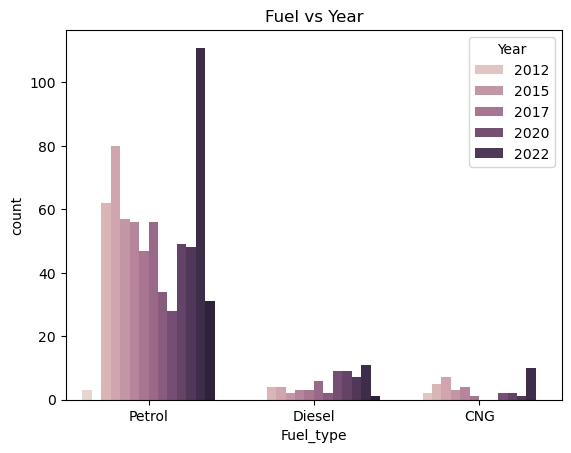

In [99]:
cat_cat(used_cars, 'Fuel_type','Year')
plt.title('Fuel vs Year')
plt.savefig('cat_cat_fuel_year')
plt.show()

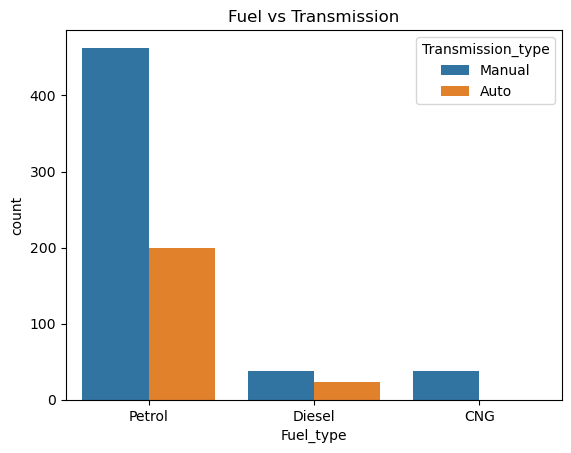

In [100]:
cat_cat(used_cars, 'Fuel_type', 'Transmission_type')
plt.title('Fuel vs Transmission')
plt.savefig('cat_cat_fuel_trans.jpg')
plt.show()

### crosstab for brand and year

Year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Brand,,,,,,,,,,,,,,
Datsun,0,0,0,0,0,3,4,10,3,0,0,0,0,0
Ford,0,0,0,0,1,1,1,1,0,0,0,0,0,0
Honda,0,0,10,3,13,4,4,8,3,2,4,1,0,3
Hyundai,3,0,22,31,18,21,14,5,6,2,17,5,23,11
Jeep,0,0,0,0,0,0,0,3,0,0,0,0,0,0
KIA,0,0,0,0,0,0,0,0,2,9,5,5,5,0
MG,0,0,0,0,0,0,0,0,4,2,4,0,10,0
Mahindra,0,0,0,0,0,2,1,0,0,1,3,15,6,1
Maruti,0,2,32,41,23,17,17,24,12,12,8,7,29,10


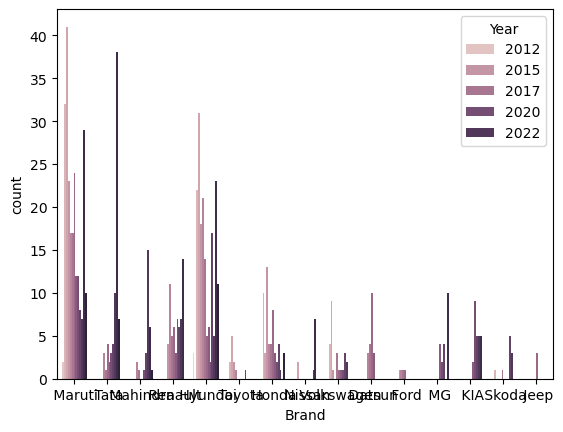

In [101]:
cat_cat(used_cars, 'Brand', 'Year')

# Multivariate analysis
In multivariate analysis more than two variables are taken and it analyses those variables.
Multivariate analysis helps us to understand the relationship between more than two variables.
Pairplot is used in multivariate analysis.
Pairplot is used to analyse continuous variables.
Pairplot includes scatter plot, Density plot, Histogram.
It helps in identifying outliers in our dataset.


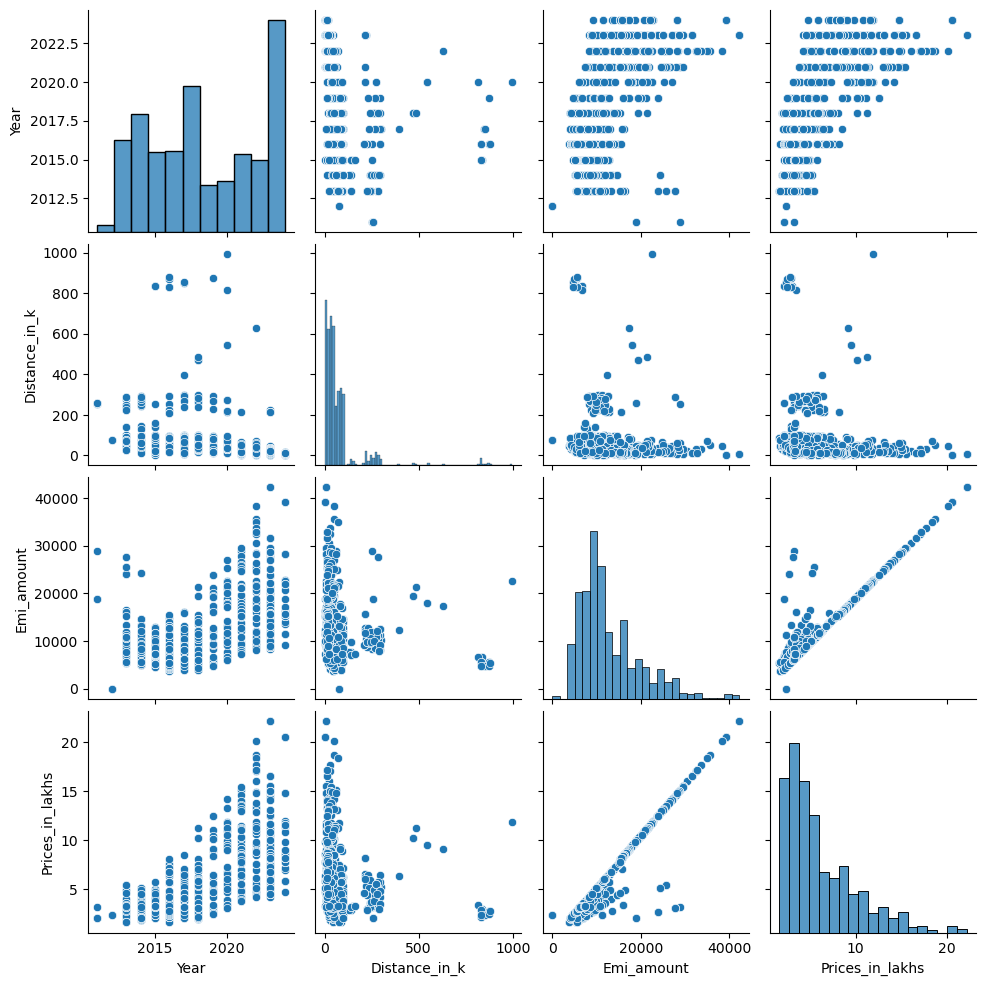

In [102]:
sns.pairplot(used_cars)
plt.savefig('multivar_pair.jpg')